In [1]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pycaret
from pycaret.classification import *
from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [3]:
data=pd.read_pickle('data/fitbit_sema_outliers_nans_replaced.pkl')

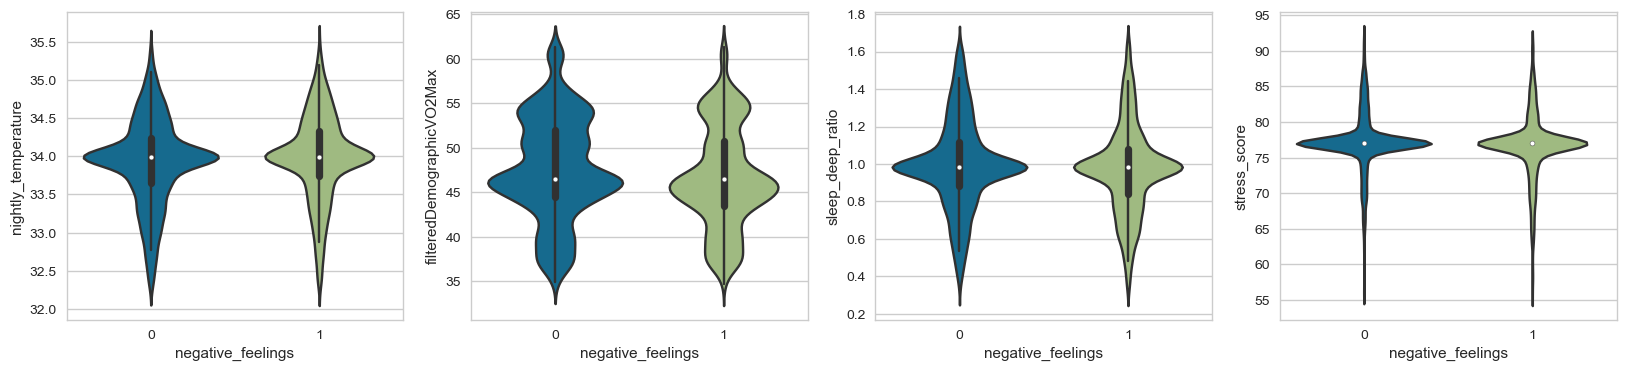

In [4]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4))

plt.subplot(1, 4, 1)
sns.violinplot(x='negative_feelings', y='nightly_temperature', data=data, split=True, scale='count');

plt.subplot(1, 4, 2)
sns.violinplot(x='negative_feelings', y='filteredDemographicVO2Max',  data=data, split=True, scale='count');

plt.subplot(1, 4, 3)
sns.violinplot(x='negative_feelings', y='sleep_deep_ratio', data=data, split=True, scale='count');

plt.subplot(1, 4, 4)
sns.violinplot(x='negative_feelings', y='stress_score', data=data, split=True, scale='count');

In [5]:
data=data.drop(columns='positive_feelings')
X = data.loc[:, data.columns != 'negative_feelings']
Y = data[['negative_feelings']]

In [6]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [7]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [8]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = None,
                               min_samples_split = 2, min_samples_leaf = 22, random_state = 42)
classifier.fit(X_Train,Y_Train)

RandomForestClassifier(min_samples_leaf=22, random_state=42)

In [9]:
Y_Pred = classifier.predict(X_Test)

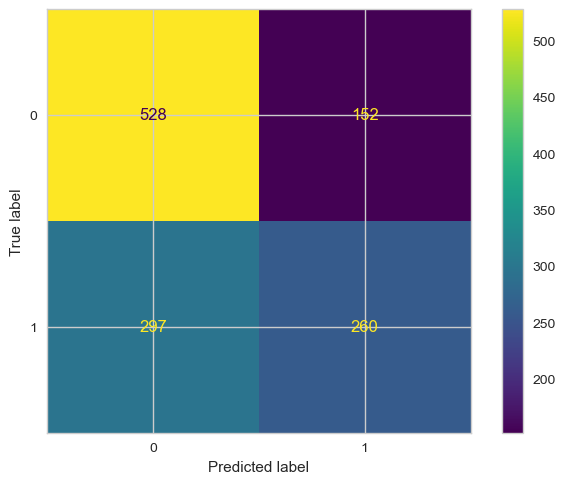

In [10]:
plot_confusion_matrix(classifier, X_Test, Y_Test)
plt.show()

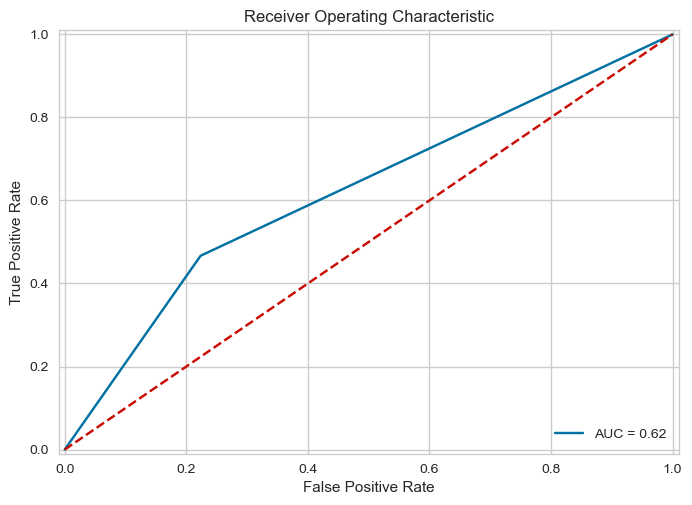

In [11]:
plot_roc_curve(Y_Test,Y_Pred)

In [12]:
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70       680
           1       0.63      0.47      0.54       557

    accuracy                           0.64      1237
   macro avg       0.64      0.62      0.62      1237
weighted avg       0.64      0.64      0.63      1237

